# Denosing Code Challenge

In [362]:
import copy

import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
from matplotlib.pyplot import plot, figure, show
from rich import print

In [363]:
# Load the data
data = sio.loadmat('denoising_codeChallenge.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'cleanedSignal', 'origSignal'])

In [364]:
# show data keys headers
print(data['origSignal'])
print(data['cleanedSignal'])

[[ 0.34069747 -0.29900363 -0.92773336 ...  1.23675819 -0.77687497
  -0.10484616]]

[[-0.45891912 -0.47168064 -0.48151474 ... -0.43723537 -0.44782886
  -0.44533749]]

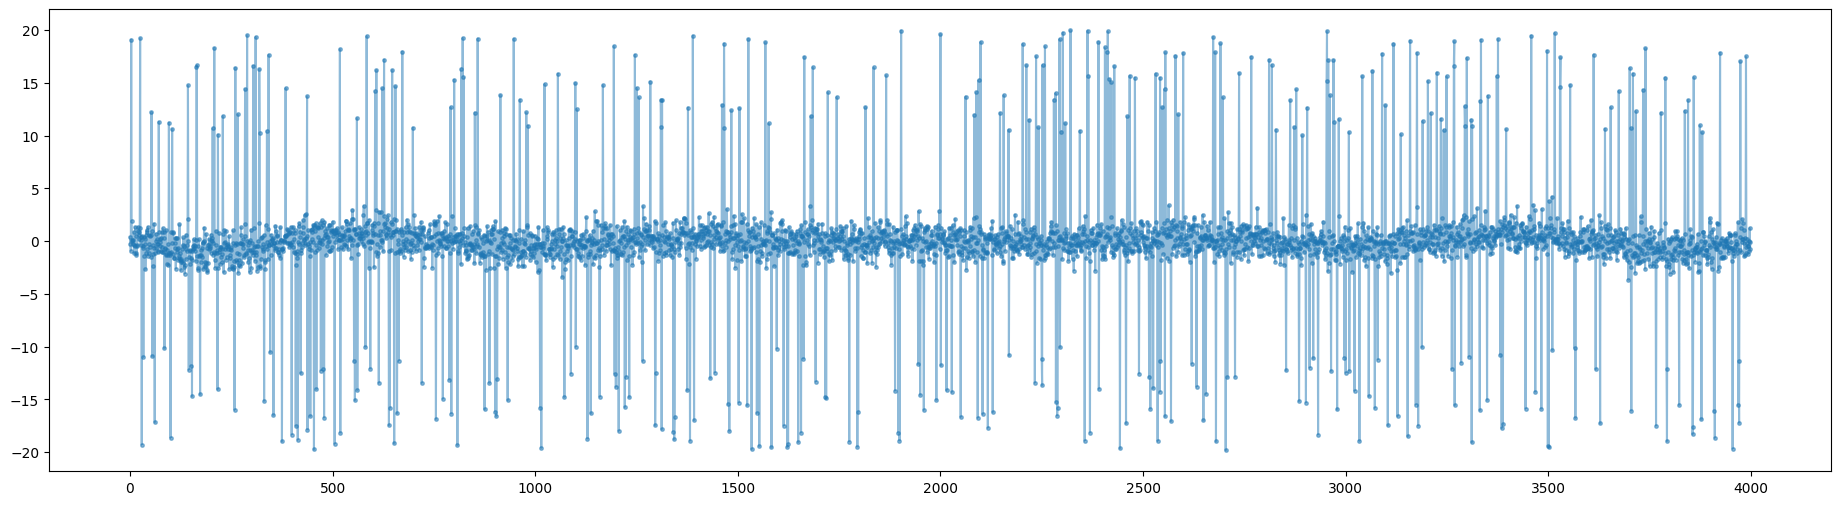

In [365]:
# Extract the data
origSignal = data['origSignal'][0]
cleanedSignal = data['cleanedSignal'][0]

# Plot the data
figure(figsize=(23, 6))
plot(origSignal, '.-', label='Original Signal', alpha=0.5, markersize=5)
# plot(cleanedSignal, label='Cleaned Signal')
show()

In [366]:
# Remove outliers using a median filter and a threshold
def remove_outliers(signal, window_size=21, threshold=5):
    """
    Remove outliers from a signal using a median filter.
    Parameters
    ----------
    signal : array_like
        The input signal.
    window_size : int
        The size of the median filter window.
    threshold : float
        The threshold for removing outliers.
    Returns
    -------
    array_like
        The cleaned signal.
    """
    k = (window_size - 1) // 2  # window size half
    n = len(signal)  # length of signal

    # initialize filtered signal
    filtsig = copy.deepcopy(signal)

    suprathresh = np.where(np.abs(signal) > threshold)[0]
    for ti in range(len(suprathresh)):
        # lower and upper bounds
        lowbnd = np.max((0, suprathresh[ti] - k))
        uppbnd = np.min((suprathresh[ti] + k + 1, n))

        # compute median of surrounding points
        filtsig[suprathresh[ti]] = np.median(signal[lowbnd:uppbnd])

    return filtsig

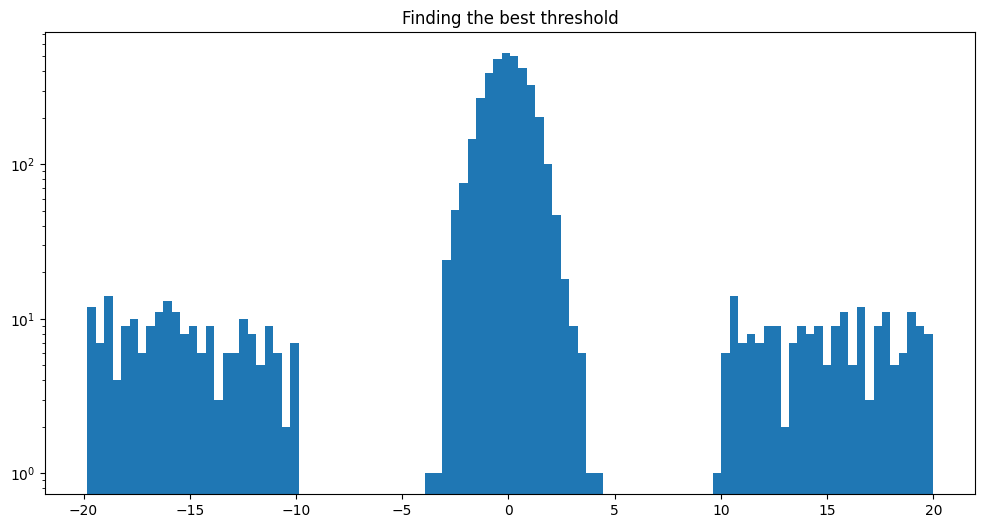

In [367]:
# Use hist to find the best threshold
figure(figsize=(12, 6))
plt.hist(origSignal, bins=100, log=True)
plt.title('Finding the best threshold')
plt.show()

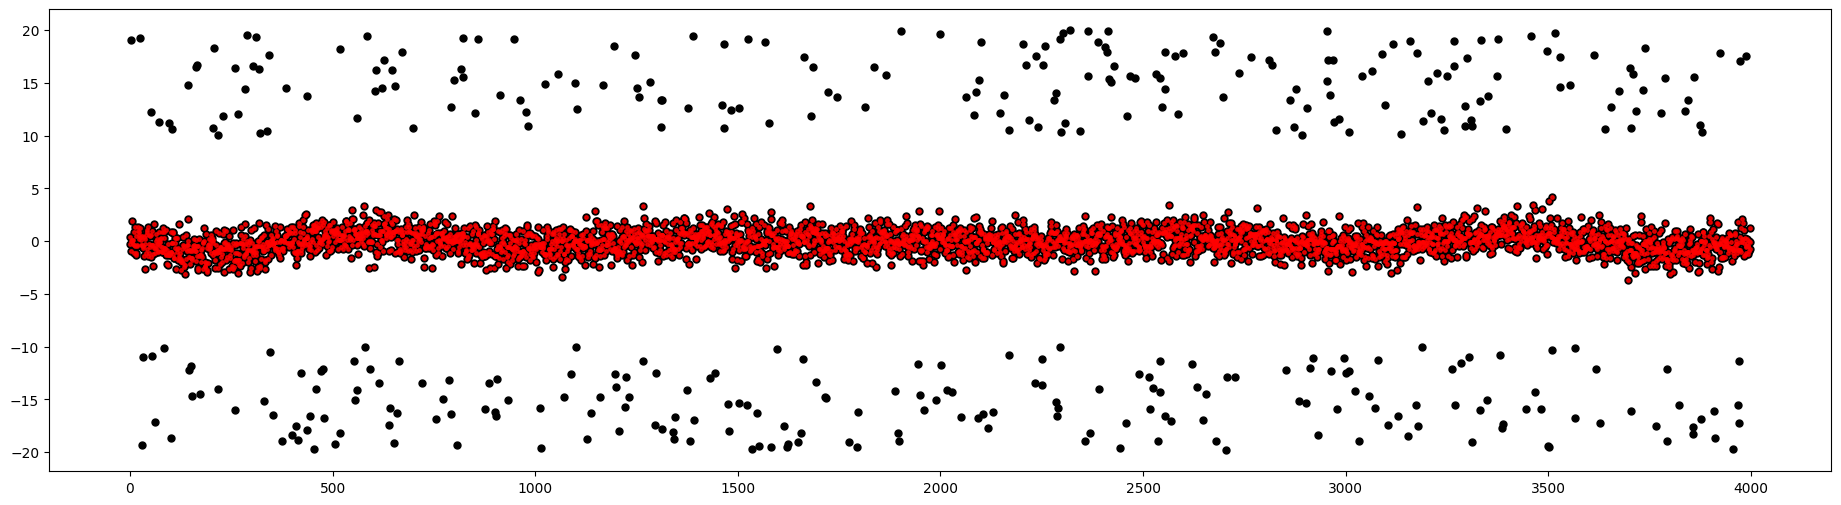

In [368]:
# Remove outliers
origSignal_cleaned = remove_outliers(origSignal, window_size=10, threshold=5)

# Plot the data
figure(figsize=(23, 6))
plot(origSignal, '.', label='Original Signal', alpha=1, markersize=10, color='black')

plot(origSignal_cleaned, '.', label='Cleaned Signal', alpha=0.8, markersize=5, color='red')
show()

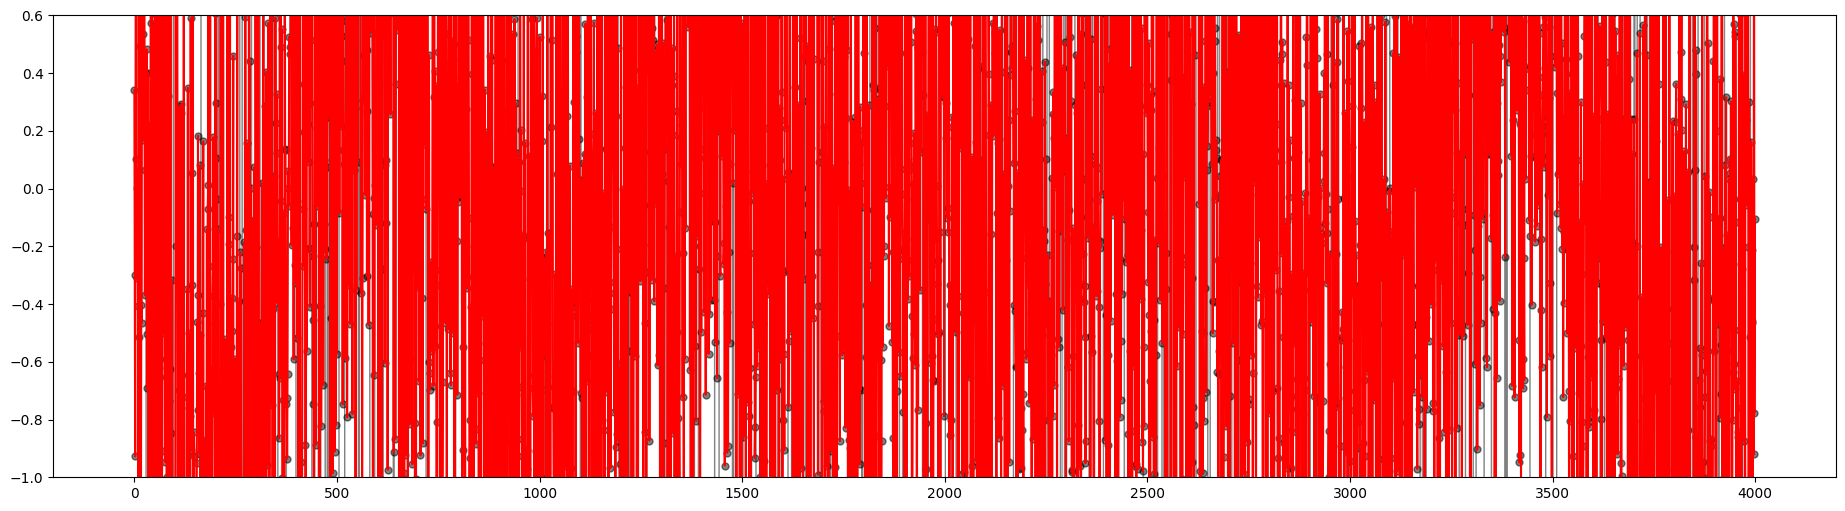

In [369]:
# plot the cleaned signal with y limits between -1 and 0.6
figure(figsize=(23, 6))
plot(origSignal, '.-', label='Original Signal', alpha=0.5, markersize=10, color='black', linewidth=0.5)
plot(origSignal_cleaned, '-', label='Cleaned Signal', alpha=1, markersize=5, color='red')
plt.ylim(-1, 0.6)
show()

In [370]:
# Gaussian Smoothing
def gaussian_smoothing(signal, fwhm=25, k=40):
    """
    Smooth a signal using a Gaussian filter.
    Parameters
    ----------
    signal : array_like
        The input signal.
    fwhm : float 
        Full-width half-maximum of the Gaussian kernel.
    k : int
        The size of the kernel (time points).
        
    Returns
    -------
    array_like
        The smoothed signal.
    """
    # n = len(signal)  # length of signal
    # 
    # # create Gaussian kernel
    gtime = np.linspace(-k, k, 2 * k + 1)
    kernel = np.exp(-4 * np.log(2) * gtime ** 2 / fwhm ** 2)
    kernel = kernel / sum(kernel)
    
    # initialize filtered signal vector
    smoothsignal = signal.copy()
    # 
    # # implement the running mean filter
    # for i in range(k + 1, n - k):
    #     # each point is the weighted average of k surrounding points
    #     smoothsignal[i] = np.sum(signal[i - k: i + k + 1] * kernel)

    # convolve signal with kernel
    smoothsignal = np.convolve(signal, kernel, mode='same')

    return smoothsignal

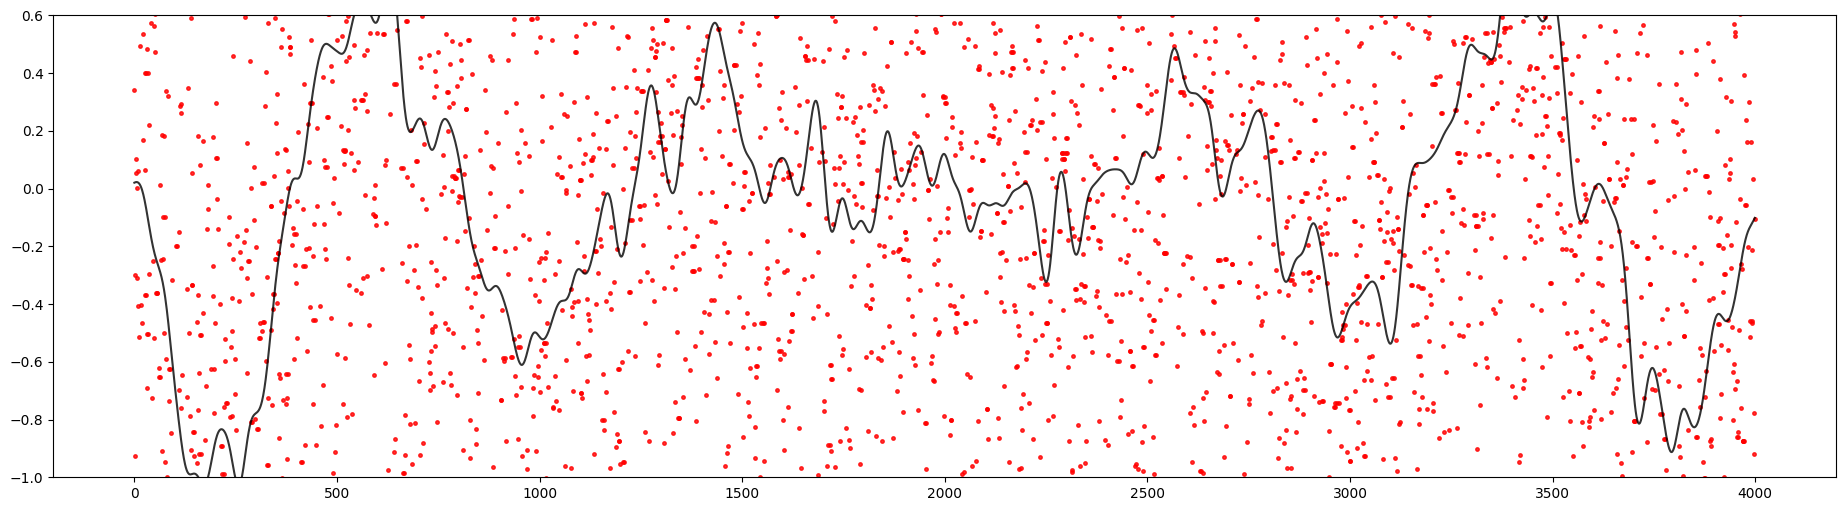

In [375]:
# Smooth the cleaned signal
origSignal_cleaned_smoothed = gaussian_smoothing(origSignal_cleaned, fwhm=40, k=200)

# Plot the data
figure(figsize=(23, 6))
plot(origSignal_cleaned, '.', label='Cleaned Signal', alpha=0.8, markersize=5, color='red')
plot(origSignal_cleaned_smoothed, label='Smoothed Signal', alpha=0.8, color='black')
plt.ylim(-1, 0.6)
show()

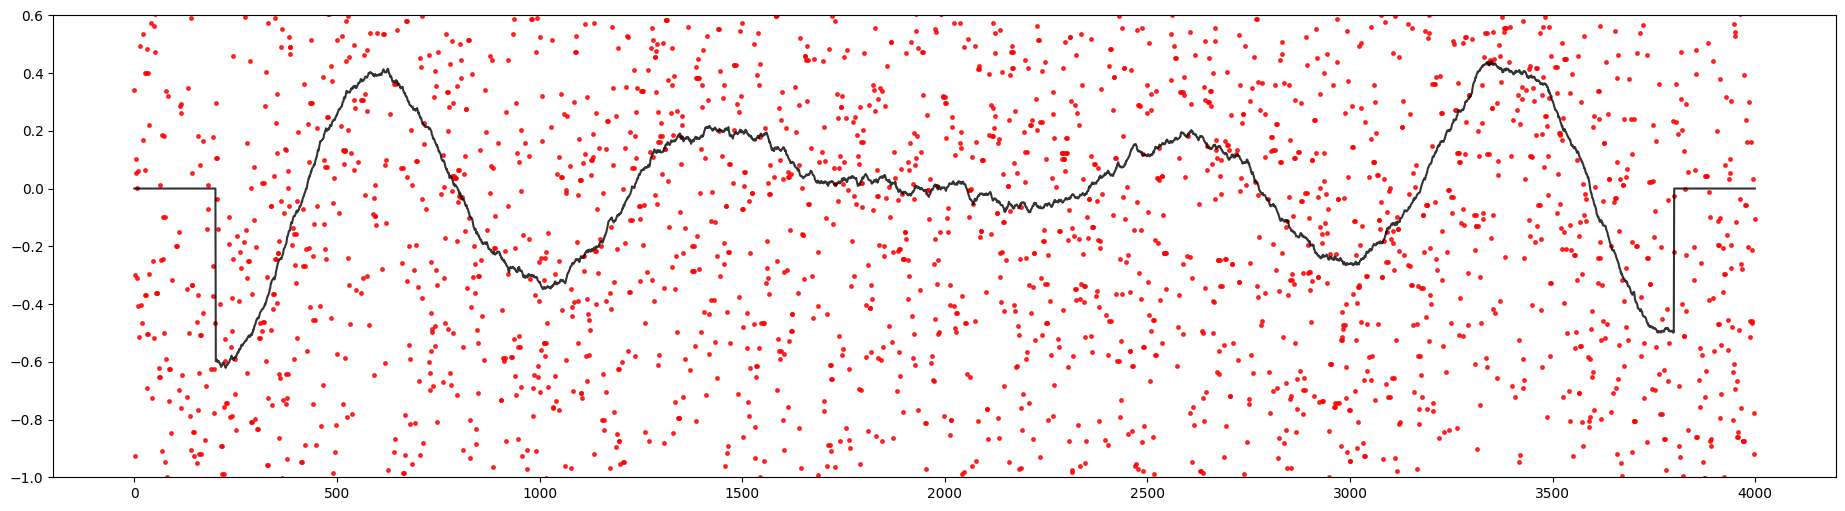

In [372]:
# Alternative method to smooth the cleaned signal: running mean filter
def running_mean_filter(signal, k=40):
    """
    Smooth a signal using a running mean filter.
    Parameters
    ----------
    signal : array_like
        The input signal.
    k : int
        The size of the kernel (time points).
        
    Returns
    -------
    array_like
        The smoothed signal.
    """
    n = len(signal)  # length of signal
    
    # initialize filtered signal vector
    smoothsignal = np.zeros(n)
    
    # implement the running mean filter
    for i in range(k + 1, n - k):
        # each point is the average of k surrounding points
        smoothsignal[i] = np.mean(signal[i - k: i + k + 1])

    return smoothsignal

# Smooth the cleaned signal
origSignal_cleaned_smoothed = running_mean_filter(origSignal_cleaned, k=200)

# Plot the data
figure(figsize=(23, 6))
plot(origSignal_cleaned, '.', label='Cleaned Signal', alpha=0.8, markersize=5, color='red')
plot(origSignal_cleaned_smoothed, label='Smoothed Signal', alpha=0.8, color='black')
plt.ylim(-1, 0.6)
show()